## Data Import

In [113]:
import numpy as np
import pandas as pd
import glob
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import entropy
import scipy.stats as stats
from scipy.fft import fft

In [114]:
os.chdir(r'C:\Users\pjk98\Data\New_Folder\Sound_Test')
file_list = glob.glob("./*.csv", recursive=True)

In [115]:
df = pd.read_csv(file_list[0], sep=',',header=0)
print(df.columns)
df

Index(['Unnamed: 0', 'Time', 'External Sound', 'Ambient Temp.',
       'Target Temp.'],
      dtype='object')


,Unnamed: 0,Time,External Sound,Ambient Temp.,Target Temp.
0,1,2023-06-04 22:29:00,550,24.49,24.51
1,2,2023-06-04 22:29:00,368,24.49,24.51
2,4,2023-06-04 22:29:00,508,24.49,24.51
3,5,2023-06-04 22:29:00,565,24.49,24.51
4,6,2023-06-04 22:29:00,515,24.49,24.51
...,...,...,...,...,...
587,595,2023-06-04 22:29:00,571,24.63,24.63
588,596,2023-06-04 22:29:00,618,24.63,24.63
589,597,2023-06-04 22:29:00,531,24.63,24.63
590,598,2023-06-04 22:29:00,409,24.63,24.63


In [116]:
drop_columns=['Unnamed: 0', 'Time','Ambient Temp.', 'Target Temp.']
df.drop(labels=drop_columns, axis=1, inplace=True) # 불필요한 컬럼 제거

In [117]:
df

,External Sound
0,550
1,368
2,508
3,565
4,515
...,...
587,571
588,618
589,531
590,409


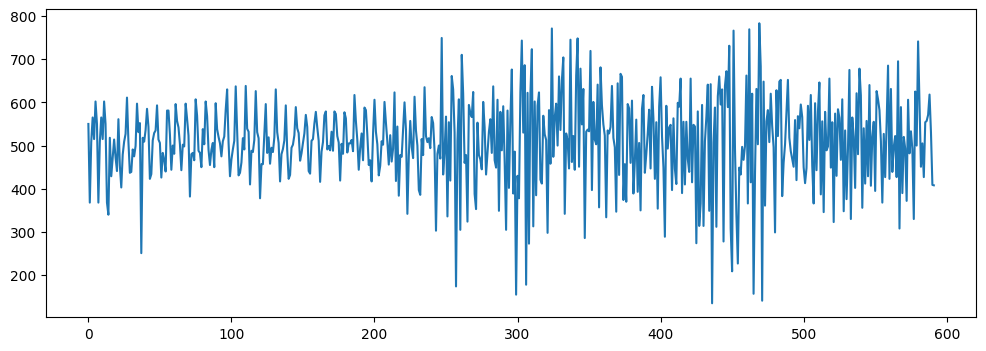

In [118]:
plt.figure(figsize=(12,4))
plt.plot(df['External Sound'])
plt.show()

# Signal Processing

In [119]:
def rms(stats):
    return(np.sqrt(np.mean(stats**2, axis=0)))
# rms(df)
# print(type(rms(df)))

In [120]:
df

,External Sound
0,550
1,368
2,508
3,565
4,515
...,...
587,571
588,618
589,531
590,409


In [14]:
rms_arr = np.array([])
for file in file_list:
    # 데이터 파일 읽기
    df = pd.read_csv(file, sep=',',header=0)
    
    drop_columns=['Unnamed: 0', 'Time','Ambient Temp.', 'Target Temp.'] # 신호처리할 필요 없는 컬럼
    df.drop(labels=drop_columns, axis=1, inplace=True) # 불필요한 컬럼 제거
    
    # rms value 추출
    rms_value = rms(df.values)
    print(type(rms_value))
    #std = np.array(df.std()) # (df.values).std()
    
    #
    rms_arr = np.concatenate([rms_arr, rms_value], axis=0)
rms_arr = rms_arr.reshape(len(file_list), 1)

rms_df = pd.DataFrame(rms_arr, columns=['External Sound'])
print(rms_df)
# rms_df.to_csv('C:\\Users\\pjk98\\Desktop\\NASA Bearing Dataset\\2nd_test\\2nd_test\\RMS_bearing.csv', index=None) # r'C:\Users\pjk98\Data\CMPS_23-05-31\CMPS_20230531\RMS.csv'

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

# CMPS
plt.figure(figsize=(12,4))
plt.plot(rms_df.values)
plt.show()

# JS
plt.figure(figsize=(12,4))
plt.plot(rms_df.values)
plt.show()

# SSJD1
plt.figure(figsize=(12,4))
plt.plot(rms_df.values)
plt.show()

# SSNC7
plt.figure(figsize=(12,4))
plt.plot(rms_df.values)
plt.show()

# 특징 추출

In [121]:
def rms(stats):
    return(np.sqrt(np.mean(stats**2, axis=0)))

In [122]:
# extract peak-to-peak features
def calculate_p2p(df):
   return np.array(df.max().abs() + df.min().abs())

# extract peak-to-peak features
# def calculate_p2p(stats): # ---> stats : df.values 로 인자로 쓸것!!! --> 배열로 반환 알고 있을 것
#     return stats.max().abs() + stats.min().abs()

# ------------------------------------------------------------------------------

# extract shannon entropy (cut signals to 500 bins) # <---- 그대로 쓰자 걍.
def calculate_entropy(df):
    ent = []
    for col in df:
        ent.append(stats.entropy(pd.cut(df['External Sound'], 500).value_counts()))
    return np.array(ent) 

# ------------------------------------------------------------------------------

# extract clearence factor # --> 리스트 형태로 반환
# def calculate_clearence(df):
#    result = []
#    for col in df:
#        r = ((np.sqrt(df[col].abs())).sum() / len(df[col]))**2
#        result.append(r)
#    return result

def calculate_clearence(stats): # ---> stats : df.values로 인자로 쓸것!!! --> 배열로 반환 알고 있을 것
    return (np.mean((np.sqrt(np.abs(stats)).sum()))**2)

def calculate_peak(stats):
    return np.array([np.max(stats)])
    

In [ ]:
# 이동평균 신호처리
def moving_average(df):
    window_size = 5 # 이동 평균에 사용할 윈도우 크기 설정
    return df.rolling(window_size, min_periods=1).mean()  # 이동 평균 적용

# min_periods = 1 : 윈도우 크기보다 작은 데이터 세트에서도 이동 평균을 계산하기 위해 필요한 최소한의 유효한 데이터 포인트 수를 지정합니다. 
# 기본값은 1로, 유효한 첫 번째 데이터 포인트부터 이동 평균을 계산합니다.

Moving_Average_arr = np.array([]) #

for file in file_list:
    # 데이터 파일 읽기
    df = pd.read_csv(file, sep=',',header=0)
    
    drop_columns=['Unnamed: 0', 'Time','Ambient Temp.', 'Target Temp.'] # 신호처리할 필요 없는 컬럼
    df.drop(labels=drop_columns, axis=1, inplace=True) # 불필요한 컬럼 제거
    # print(type(df.values))
    
    # 데이터 신호처리
    Moving_Average_signal_value = moving_average(df.values)
    # Moving_Average_signal_value = np.array(moving_average(df.values)) # <-- 리스트 형태로 반환된것을 배열로 바꿈. // fft_signal(df.values)
    
    Moving_Average_arr = np.concatenate([Moving_Average_arr, Moving_Average_signal_value], axis=0)

Moving_Average_arr = Moving_Average_arr.reshape(len(file_list), 1)

Moving_Average_df = pd.DataFrame(Moving_Average_arr, columns=['External Sound'])

In [ ]:
# FFT 신호처리 기법 사용
def fft_signal(stats): # ---> stats : df.values로 인자로 쓸것!!! --> 배열로 반환 알고 있을 것 / 하지만 여기서는 df(데이터프레임)형태로 추정된다.
    return np.abs(np.fft.fft(stats.values)).astype(int)[0] # <--- [0]은 뭘까?? 아무해도 0번째 열을 활용하기 위해서 사용됬을거로 추정됨.

FFT_arr = np.array([]) #

for file in file_list:
    # 데이터 파일 읽기
    df = pd.read_csv(file, sep=',',header=0)
    
    drop_columns=['Unnamed: 0', 'Time','Ambient Temp.', 'Target Temp.'] # 신호처리할 필요 없는 컬럼
    df.drop(labels=drop_columns, axis=1, inplace=True) # 불필요한 컬럼 제거
    # print(type(df.values))
    
    # 데이터 신호처리
    fft_signal_value = fft_signal(df.values)
    # fft_signal_value = np.array(fft_signal(df.values)) # <-- 리스트 형태로 반환된것을 배열로 바꿈. // fft_signal(df.values)
    
    FFT_arr = np.concatenate([FFT_arr, fft_signal_value], axis=0)

FFT_arr = FFT_arr.reshape(len(file_list), 1)

FFT_df = pd.DataFrame(FFT_arr, columns=['External Sound'])

In [123]:
rms_arr = np.array([]) #
std_arr = np.array([]) #
skew_arr = np.array([]) #
kurtosis_arr = np.array([]) #
entropy_arr = np.array([]) #
p2p_arr = np.array([]) #
crest_arr = np.array([])#
clearence_arr = np.array([]) #
shape_arr = np.array([]) #
impulse_arr = np.array([])#
peak_arr = np.array([]) #


for file in file_list:
    # 데이터 파일 읽기
    df = pd.read_csv(file, sep=',',header=0)
    
    drop_columns=['Unnamed: 0', 'Time','Ambient Temp.', 'Target Temp.'] # 신호처리할 필요 없는 컬럼
    df.drop(labels=drop_columns, axis=1, inplace=True) # 불필요한 컬럼 제거
    # print(type(df.values))
    
    # value 추출
    rms_value = rms(df.values)
    mean_abs = np.abs(np.array([(df.values).mean()]))
    std = np.array([(df.values).std()]) 
    # skew = np.array((df.values).skew())
    skew_value = (df.values - np.mean(df.values)) / np.std(df.values)
    skewness = stats.skew(skew_value)
    kurtosis = stats.kurtosis(df.values)
    entropy = calculate_entropy(df)
    max_abs = np.abs(np.array((df.values).max()))
    p2p = calculate_p2p(df)
    crest = max_abs / rms_value
    clearence = np.array(calculate_clearence(df.values)) # <-- 리스트 형태로 반환된것을 배열로 바꿈. // calculate_clearence(df.values)
    shape = rms_value / mean_abs
    impulse = max_abs / mean_abs
    peak = calculate_peak(df.values)
    
    rms_arr = np.concatenate([rms_arr, rms_value], axis=0)
    peak_arr = np.concatenate([peak_arr, peak], axis=0)
    p2p_arr = np.concatenate([p2p_arr, p2p], axis=0)
    std_arr = np.concatenate([std_arr, std], axis=0)
    crest_arr = np.concatenate([crest_arr, crest], axis=0)
    impulse_arr = np.concatenate([impulse_arr, impulse], axis=0)
    shape_arr = np.concatenate([shape_arr, shape], axis=0)
    clearence_arr = np.concatenate([clearence_arr, shape], axis=0)
    kurtosis_arr = np.concatenate([kurtosis_arr, kurtosis], axis=0)
    entropy_arr = np.concatenate([entropy_arr, kurtosis], axis=0)
    skew_arr = np.concatenate([skew_arr, skewness], axis=0)
    
rms_arr = rms_arr.reshape(len(file_list), 1)
peak_arr = peak_arr.reshape(len(file_list), 1)
p2p_arr = p2p_arr.reshape(len(file_list), 1)
std_arr = std_arr.reshape(len(file_list), 1)
crest_arr = crest_arr.reshape(len(file_list), 1)
impulse_arr = impulse_arr.reshape(len(file_list), 1)
shape_arr = shape_arr.reshape(len(file_list), 1)
clearence_arr = clearence_arr.reshape(len(file_list), 1)
kurtosis_arr = kurtosis_arr.reshape(len(file_list), 1)
entropy_arr = entropy_arr.reshape(len(file_list), 1)
skew_arr = skew_arr.reshape(len(file_list), 1)


rms_df = pd.DataFrame(rms_arr, columns=['External Sound'])
peak_df = pd.DataFrame(peak_arr, columns=['External Sound'])
p2p_df = pd.DataFrame(p2p_arr, columns=['External Sound'])
std_df = pd.DataFrame(std_arr, columns=['External Sound'])
crest_df = pd.DataFrame(crest_arr, columns=['External Sound'])
impulse_df = pd.DataFrame(impulse_arr, columns=['External Sound'])
shape_df = pd.DataFrame(shape_arr, columns=['External Sound'])
clearence_df = pd.DataFrame(clearence_arr, columns=['External Sound'])
kurtosis_df = pd.DataFrame(kurtosis_arr, columns=['External Sound'])
entropy_df = pd.DataFrame(entropy_arr, columns=['External Sound'])
skewness_df = pd.DataFrame(skew_arr, columns=['External Sound'])

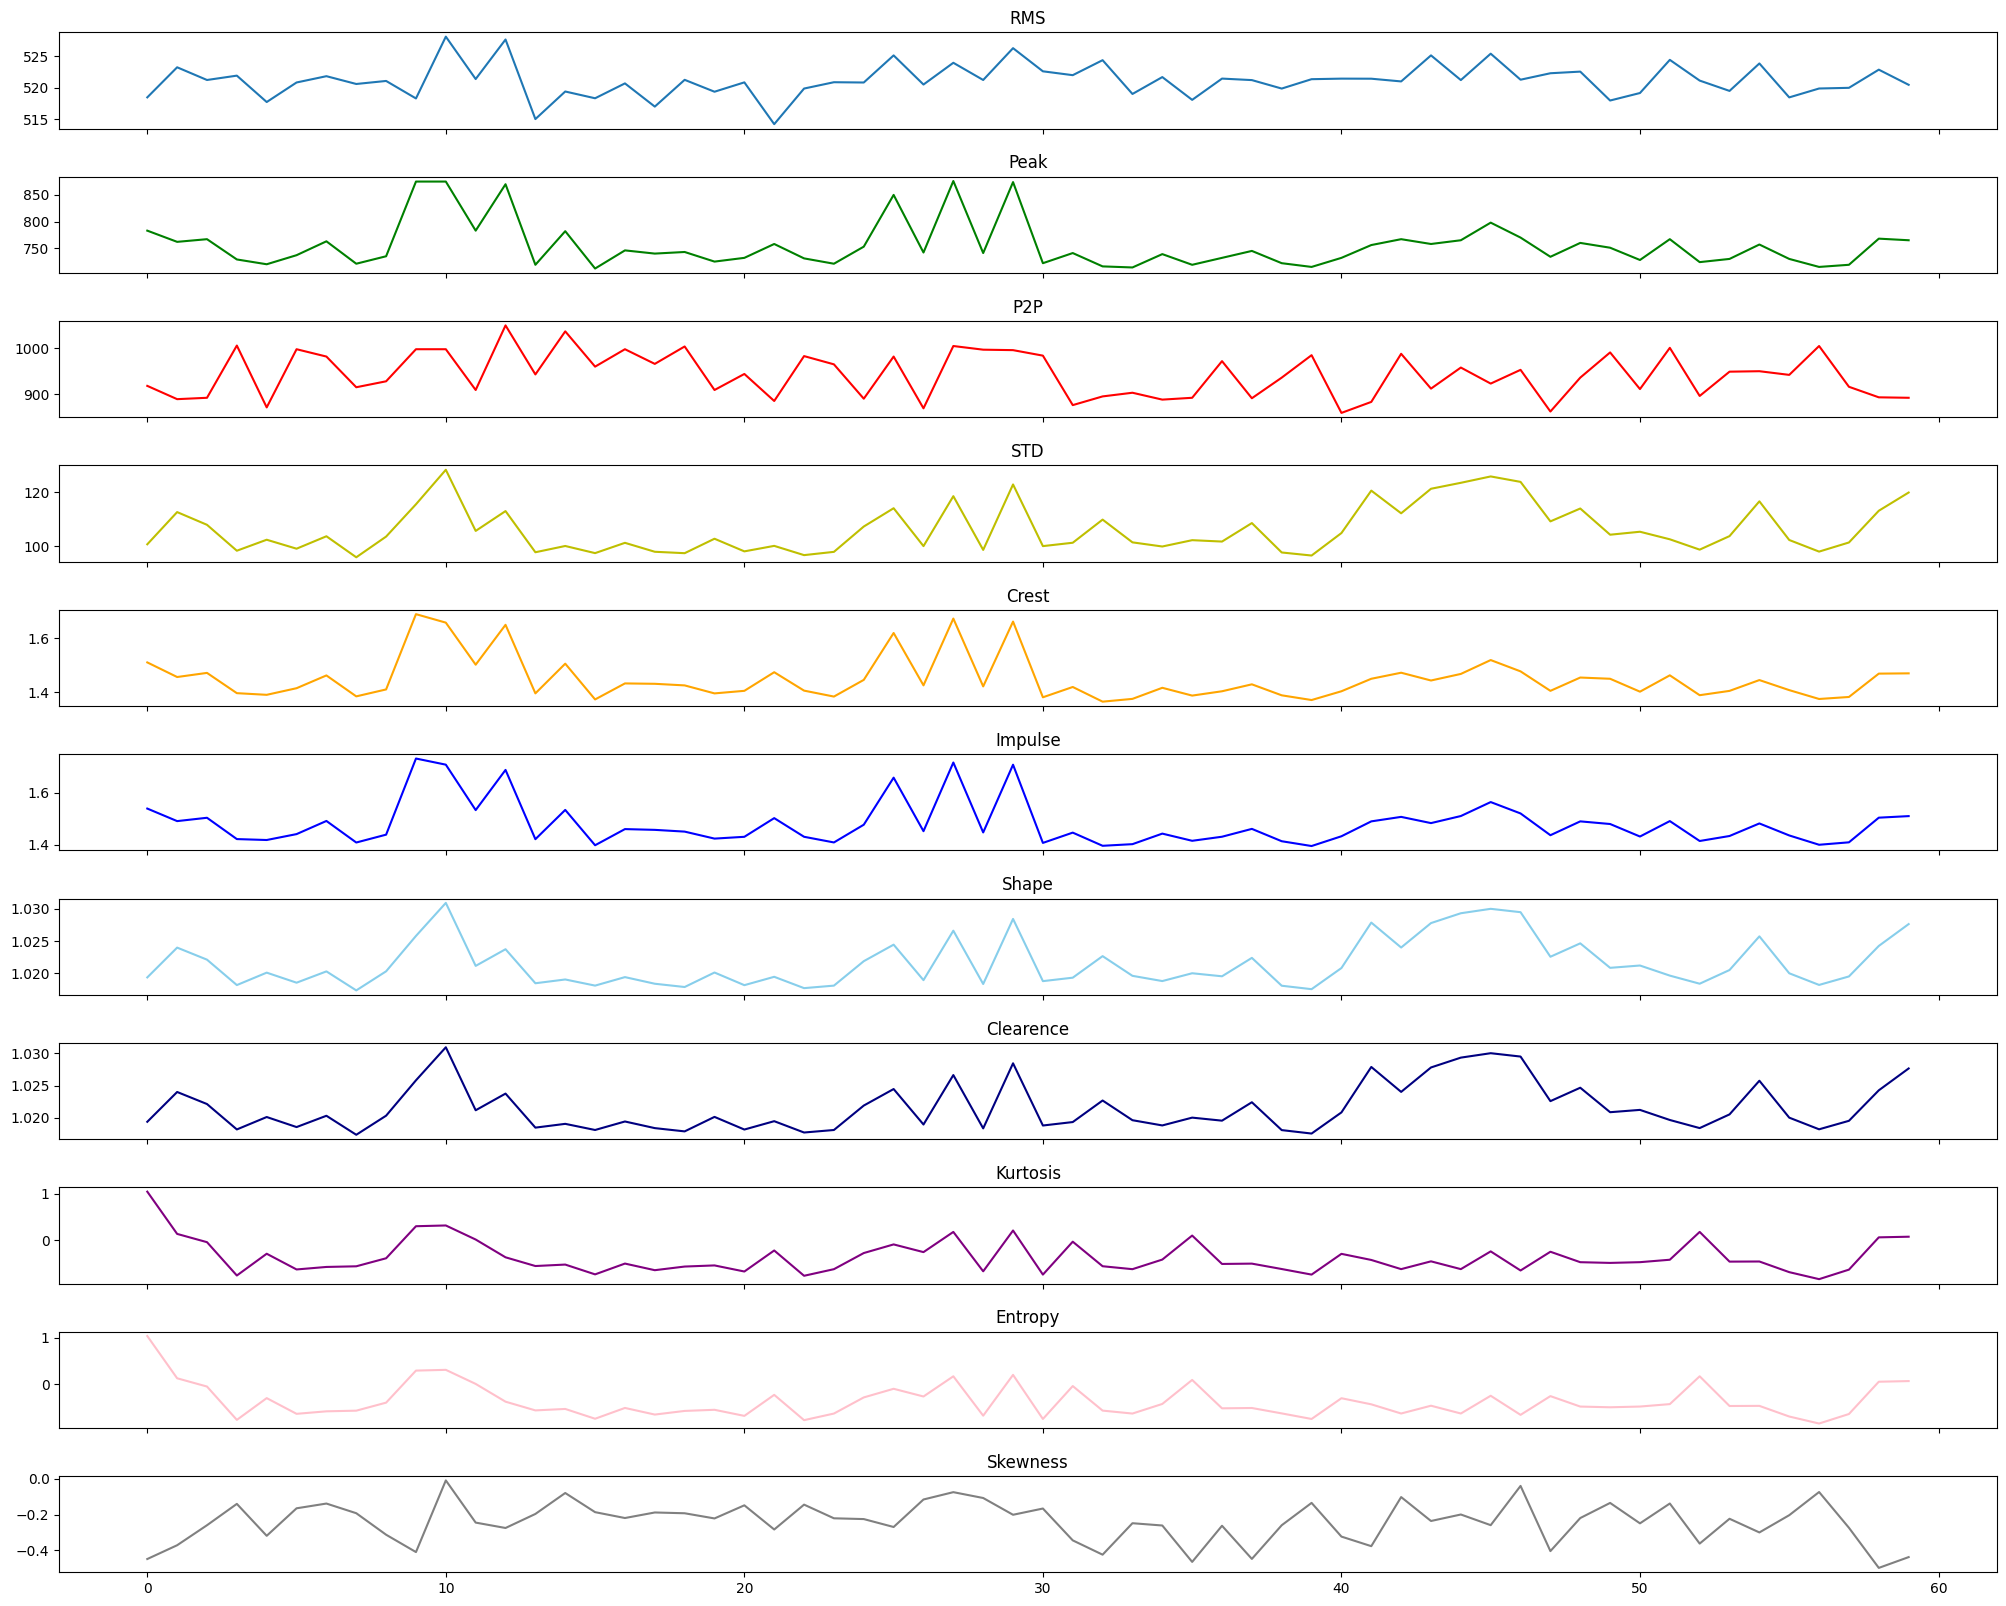

In [141]:
# CMPS

fig, ax = plt.subplots(11,1, figsize=(25,20), sharex='all')
# fig, ax = plt.subplots(12,1, figsize=(25,20), sharex='all')
plt.subplots_adjust(hspace=0.5, wspace=0.5)

ax[0].plot(rms_df.values)
ax[1].plot(peak_df.values, color='g')
ax[2].plot(p2p_df.values, color='r')
ax[3].plot(std_df.values, color='y')
ax[4].plot(crest_df.values, color='orange')
ax[5].plot(impulse_df.values, color='b')
ax[6].plot(shape_df.values, color='skyblue')
ax[7].plot(clearence_df.values, color='navy')
ax[8].plot(kurtosis_df.values, color='purple')
ax[9].plot(entropy_df.values, color='pink')
ax[10].plot(skewness_df.values, color='gray')
# ax[11].plot(FFT_df.values, color='lightgray')

ax[0].set_title("RMS")
ax[1].set_title("Peak")
ax[2].set_title("P2P")
ax[3].set_title("STD")
ax[4].set_title("Crest")
ax[5].set_title("Impulse")
ax[6].set_title("Shape")
ax[7].set_title("Clearence")
ax[8].set_title("Kurtosis")
ax[9].set_title("Entropy")
ax[10].set_title("Skewness")
# ax[11].set_title("FFT")

plt.show()

# plt.plot(rms_df.values)
# plt.show()

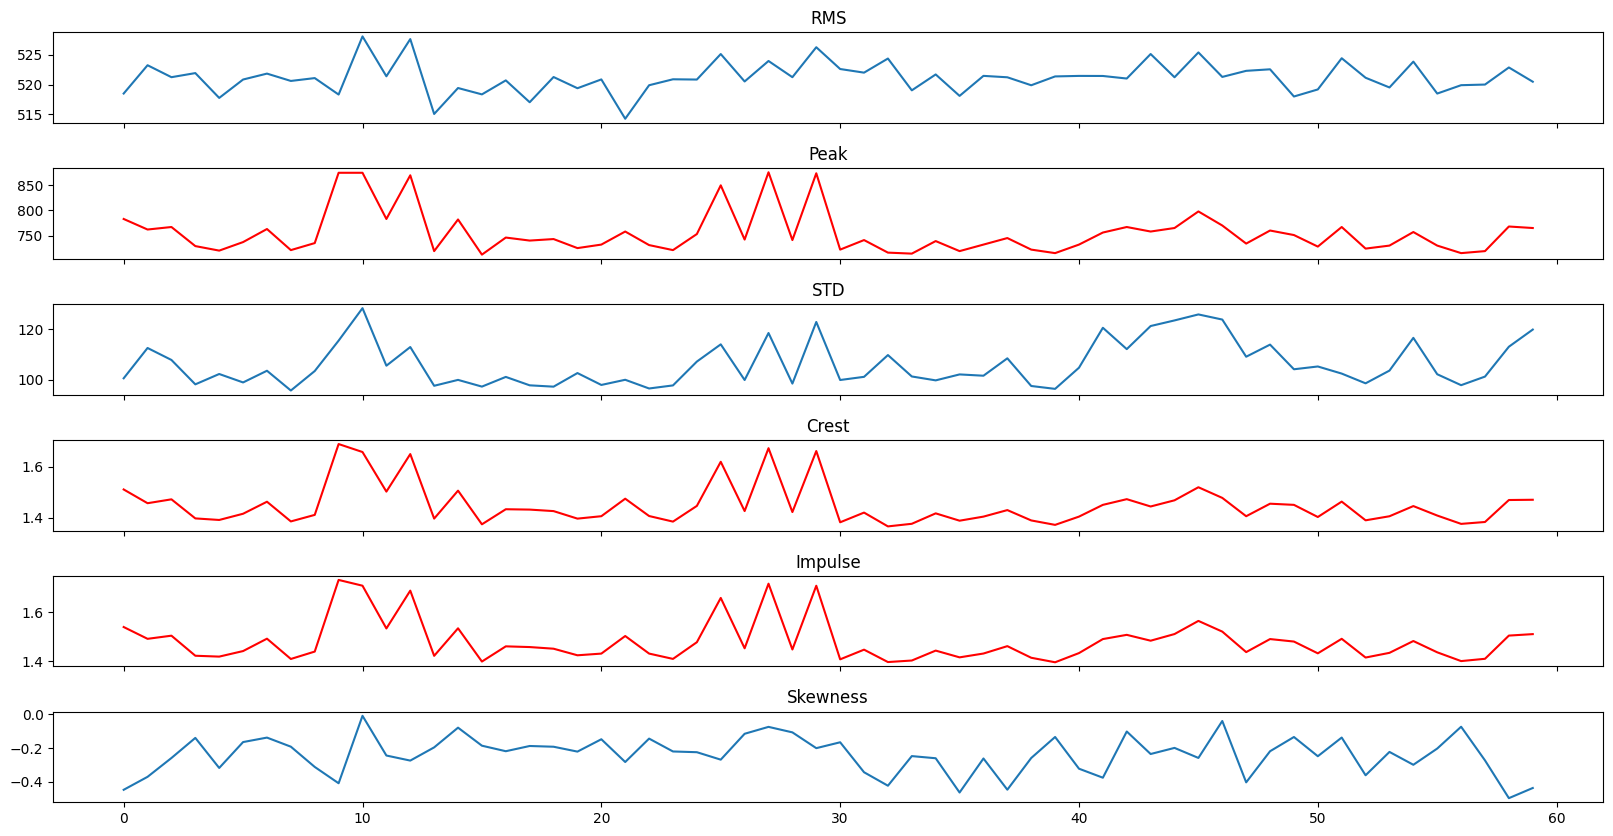

In [139]:
fig, ax = plt.subplots(6,1, figsize=(20,10), sharex='all')
plt.subplots_adjust(hspace=0.5, wspace=0.5)

ax[0].plot(rms_df.values)
ax[1].plot(peak_df.values, color='r')
ax[2].plot(std_df.values)
ax[3].plot(crest_df.values, color='r')
ax[4].plot(impulse_df.values, color='r')
ax[5].plot(skewness_df.values)

ax[0].set_title("RMS")
ax[1].set_title("Peak")
ax[2].set_title("STD")
ax[3].set_title("Crest")
ax[4].set_title("Impulse")
ax[5].set_title("Skewness")

plt.show()